### Pre-Processing, Setup and ED

Importing the data is taken care by kaggle.<br>
Just upload your kaggle.json API token file(You can get it from your accounts page on Kaggle)

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zotako","key":"cd7d7e8bbf688035e9cbe2ac09c40e5f"}'}

In [ ]:
!pip install pmdarima

In [ ]:
!pip3 install geopandas

     |████████████████████████████████| 1.0 MB 15.0 MB/s 
     |████████████████████████████████| 15.4 MB 71.3 MB/s 
     |████████████████████████████████| 6.3 MB 36.7 MB/s 


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip3 install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28581 sha256=293dfc57262ec0531b3728881b9790dae14b84a64e5b9b2dfcba2de8c49b26d3
  Stored in directory: /root/.cache/pip/wheels/6b/f5/21/cdd12e476182b4b0b98326cdb9efa02ddbd5d87ca5de051c84
Successfully built mplleaflet


In [ ]:
import mplleaflet as mpll

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          16957  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10252  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4743  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3730  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d tsiaras/uk-road-safety-accidents-and-vehicles

 97% 138M/142M [00:02<00:00, 57.6MB/s]
100% 142M/142M [00:02<00:00, 51.9MB/s]


In [ ]:
! mkdir train
! unzip uk-road-safety-accidents-and-vehicles.zip -d train

Archive:  uk-road-safety-accidents-and-vehicles.zip
  inflating: train/Accident_Information.csv  
  inflating: train/Vehicle_Information.csv  


In [ ]:
import os
for dirname, _, filenames in os.walk('train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


train/Vehicle_Information.csv
train/Accident_Information.csv


### Pre-processing Data

In [ ]:
accidents=pd.read_csv("train/Accident_Information.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
accidents['Local_Authority_(Highway)'].value_counts().to_frame().head(50)

,Local_Authority_(Highway)
Kent,57801
Surrey,52676
Lancashire,44968
Essex,44161
Hampshire,41600
Birmingham,39662
Hertfordshire,37419
Staffordshire,31083
Lincolnshire,29606
Nottinghamshire,27488


In [ ]:
accidents.dropna(subset=['Latitude','Longitude'], inplace=True)

In [ ]:
accidents.shape

(2047081, 34)

Grouping monthly data and converting it to Year-Month

In [ ]:
liv_df=pd.DataFrame()
accidents['Date']=pd.to_datetime(accidents.loc[accidents['Local_Authority_(Highway)']=='Liverpool']['Date'])
# liv_df['Year']=accidents.loc[accidents['Local_Authority_(Highway)']=='Liverpool']['Year']
liv_df['Year-Month']=accidents.loc[accidents['Local_Authority_(Highway)']=='Liverpool']['Date'].dt.to_period('M')
arr=[1 for _ in range(liv_df.shape[0])]
# liv_df=liv_df.append(pd.DataFrame({'Total':arr}))
liv_df['Total']=1
liv_df=liv_df.groupby(['Year-Month'])[['Total']].sum().reset_index()
liv_df.head()

,Year-Month,Total
0,2005-01,155
1,2005-02,170
2,2005-03,155
3,2005-04,193
4,2005-05,193


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
liv_df['Year']=liv_df['Year-Month'].apply(lambda x:x.to_timestamp())
liv_df.head()

,Year-Month,Total,Year
0,2005-01,155,2005-01-01
1,2005-02,170,2005-02-01
2,2005-03,155,2005-03-01
3,2005-04,193,2005-04-01
4,2005-05,193,2005-05-01


In [ ]:
liv_df=liv_df.set_index('Year')
liv_df.head()

,Year-Month,Total
Year,,
2005-01-01,2005-01,155
2005-02-01,2005-02,170
2005-03-01,2005-03,155
2005-04-01,2005-04,193
2005-05-01,2005-05,193


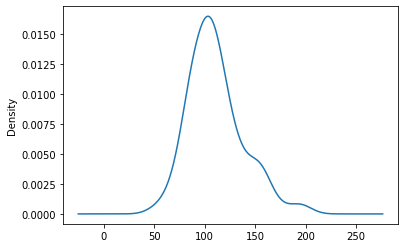

In [ ]:
liv_plt=liv_df['Total']
liv_plt.plot(kind='kde')

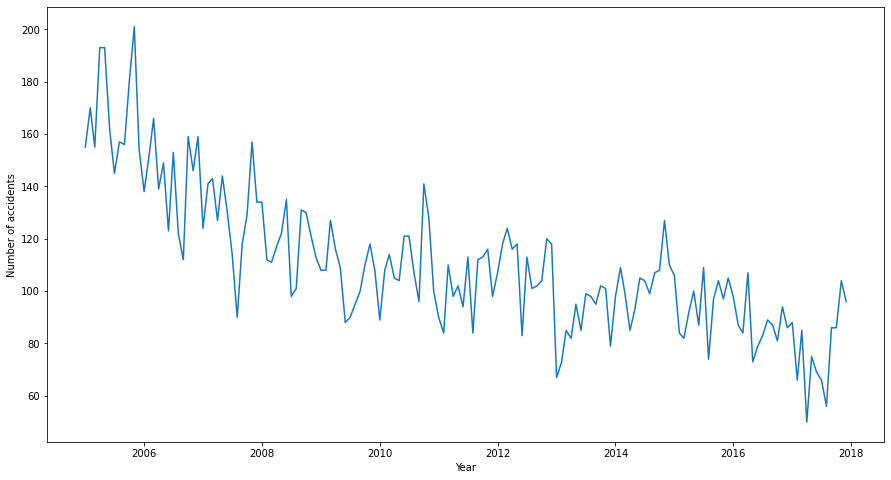

Text(0.5, 1.0, 'Number of Accidents in Liverpool every year')

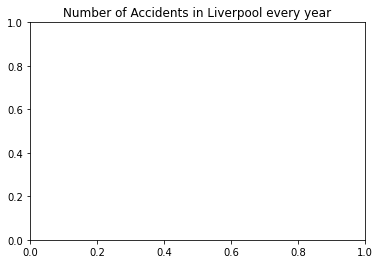

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.plot(liv_df['Total'])
plt.show()
plt.title('Number of Accidents in Liverpool every year')

Seasonal Decomposition

<Figure size 432x288 with 0 Axes>

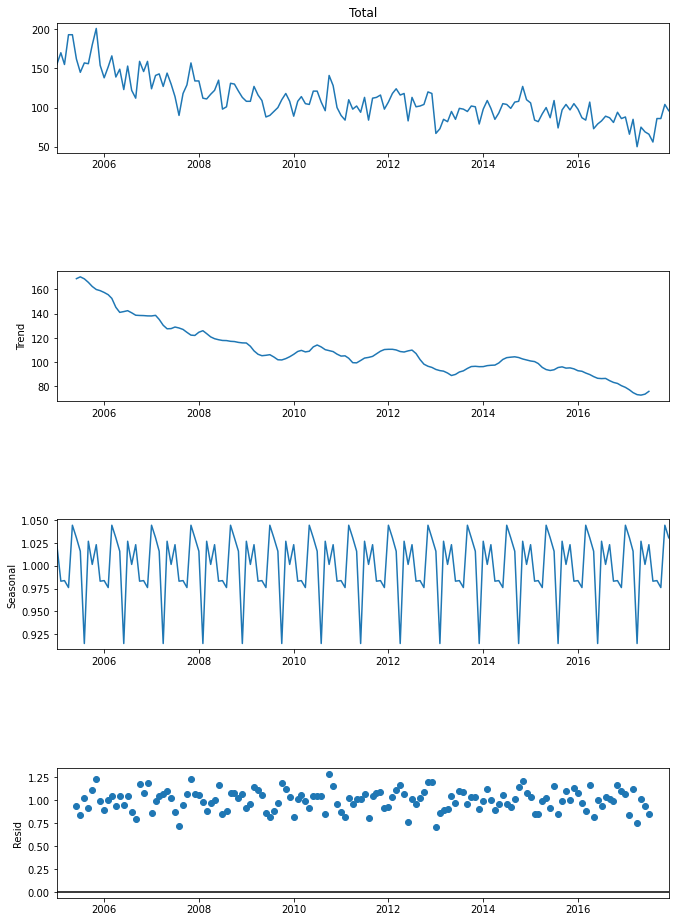

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(liv_df['Total'], model='multiplicative', period = 10)
plt.figure()
fig=result.plot()
fig.set_size_inches(10, 15)

In [ ]:
df_total=liv_df['Total']

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

Dickey Fuller Test to check for stationarity
<br>
**Null Hypothesis: Data is not stationary**
<br>
**Alternate Hypothesis: Data is stationary**

In [ ]:
result = adfuller(df_total, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -3.207853514183708
p-value: 0.019534563858402406


Since p-value<0.05 we can reject the null hypothesis. **Data is stationary.**

ACF and PACF Plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


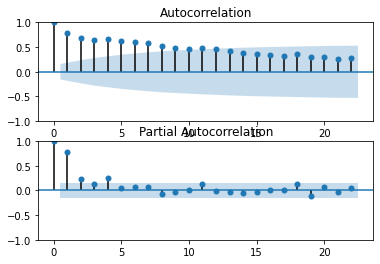

In [ ]:
pyplot.subplot(211)
plot_acf(df_total, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(df_total, ax=pyplot.gca())
pyplot.show()

In [ ]:
 from sklearn.model_selection import train_test_split

Moving Average Plot

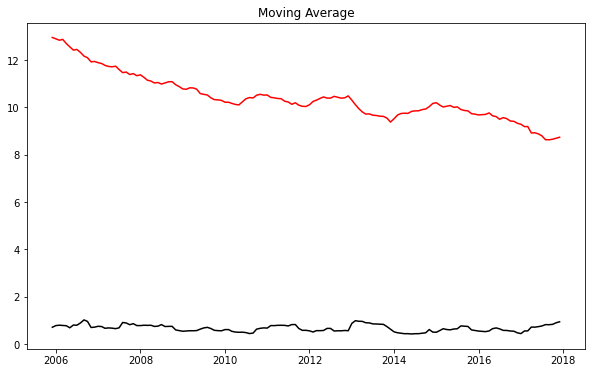

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.sqrt(df_total)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.show()

Training Vs Test Data Plot

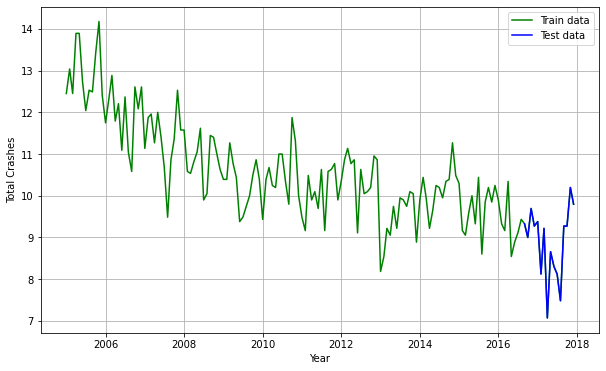

In [ ]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Total Crashes')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

### Building the Model

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=6, max_q=6, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=338.144, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=326.432, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=300.961, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=336.357, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=295.653, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=296.421, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=297.073, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=295.218, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=296.825, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=297.683, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=298.656, Time=0.03 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.049 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  137
Model: 

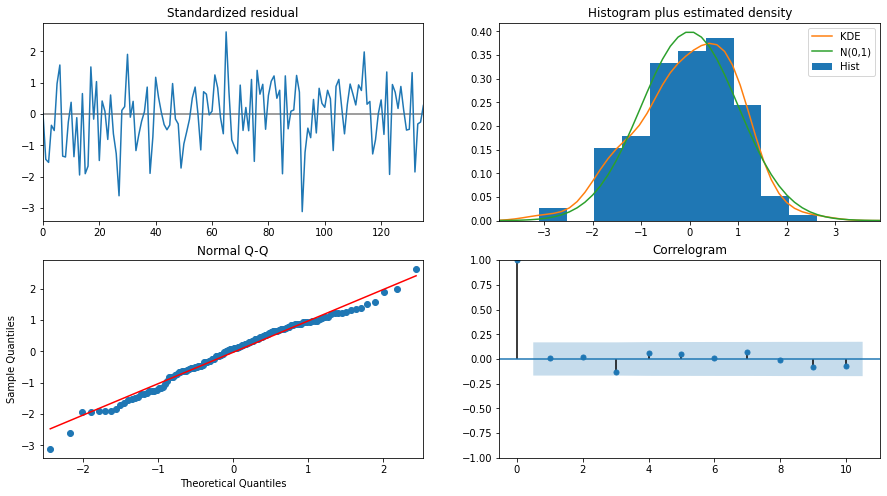

In [ ]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

ARIMA Model

In [ ]:
model = ARIMA(train_data, order=(0,1,2))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  137
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -146.328
Date:                Sun, 05 Dec 2021   AIC                            298.656
Time:                        03:52:25   BIC                            307.394
Sample:                    04-01-2005   HQIC                           302.207
                         - 08-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5757      0.085     -6.793      0.000      -0.742      -0.410
ma.L2         -0.2020      0.085     -2.364      0.018      -0.369      -0.035
sigma2         0.5006      0.057      8.805      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


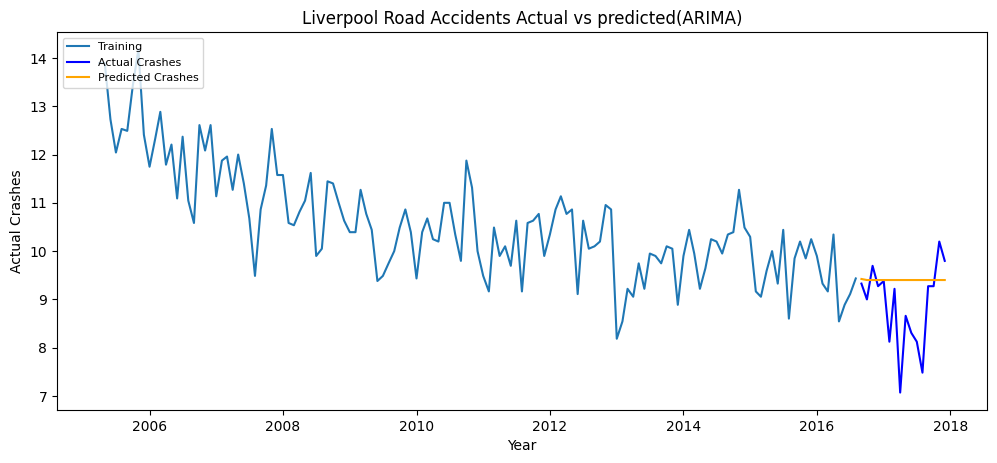

In [ ]:
fc = fitted.get_forecast(150,exog=None, alpha=0.05)
fc_series = pd.Series(fc.predicted_mean, index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training')
plt.plot(test_data, color = 'blue', label='Actual Crashes')
plt.plot(fc_series, color = 'orange',label='Predicted Crashes')
plt.title('Liverpool Road Accidents Actual vs predicted(ARIMA)')
plt.xlabel('Year')
plt.ylabel('Actual Crashes')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn import metrics
fc_test=pd.Series(fc.predicted_mean, index=test_data.index)
print('ARIMA Model Stats')
mse = mean_squared_error(test_data, fc_test)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc_test)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc_test))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc_test - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))
print()

ARIMA Model Stats
MSE: 0.9531314941719268
MAE: 0.7005260022915876
RMSE: 0.9762845354567113
MAPE: 0.08654080719531453



SARIMA Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train_data, order=(0,1,2),seasonal_order=(0,1,2,12))  
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                  137
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -131.926
Date:                            Sun, 05 Dec 2021   AIC                            273.853
Time:                                    03:52:37   BIC                            287.954
Sample:                                04-01-2005   HQIC                           279.581
                                     - 08-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6930      0.091     -7.590      0.000      -0.872      -0.514
ma.L2         -0.1004      0.087   

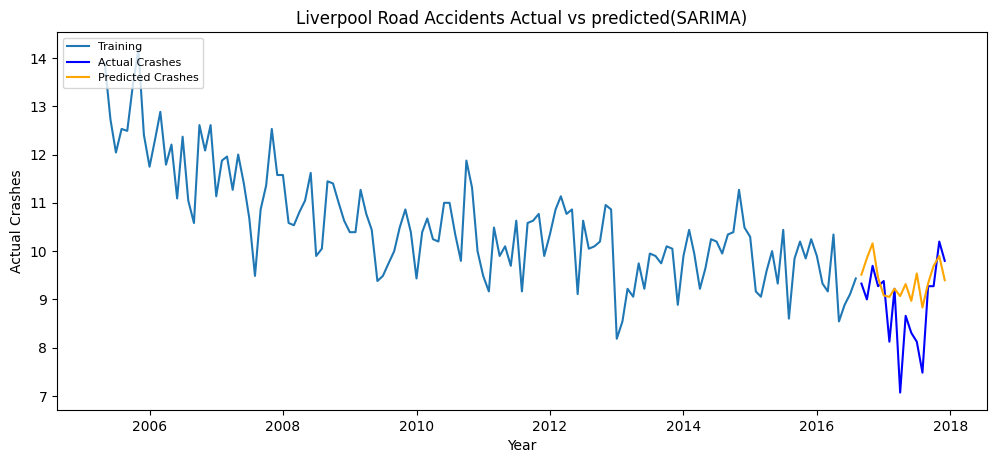

In [ ]:
fc = fitted.get_forecast(150,exog=None, alpha=0.05)
fc_series = pd.Series(fc.predicted_mean, index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training')
plt.plot(test_data, color = 'blue', label='Actual Crashes')
plt.plot(fc_series, color = 'orange',label='Predicted Crashes')
plt.title('Liverpool Road Accidents Actual vs predicted(SARIMA)')
plt.xlabel('Year')
plt.ylabel('Actual Crashes')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn import metrics
fc_test=pd.Series(fc.predicted_mean, index=test_data.index)
print('SARIMA Model Stats')
mse = mean_squared_error(test_data, fc_test)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc_test)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc_test))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc_test - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))
print()

SARIMA Model Stats
MSE: 0.6923637355753509
MAE: 0.6360302499525947
RMSE: 0.8320839714688362
MAPE: 0.07770113094220965

